In [3]:
import gzip
import pandas as pd
import scanpy as sc
import schist as scs
import sklearn.metrics as skm
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [4]:
sc.settings.verbosity=2

sc.set_figure_params(dpi_save=300, dpi=100)

In [5]:
C05 = sc.read_mtx('Crypt/GSM3308717_C04.mtx.gz')

C05 = C05.T

C05.obs_names = [x.decode('ascii').strip() for x in gzip.open("Crypt/GSM3308718_C05_barcodes.tsv.gz")]
C05.var_names = [x.decode('ascii').split()[1] for x in gzip.open("Crypt/GSM3308718_C05_genes.tsv.gz")]

C05.var_names_make_unique()

C05.write("Crypt_C05.h5ad")

In [6]:
sc.pp.filter_cells(C05, min_genes=200)
sc.pp.filter_genes(C05, min_cells=2)
sc.pp.normalize_total(C05, target_sum=1e4)
sc.pp.log1p(C05)

filtered out 4 cells that have less than 200 genes expressed
filtered out 11707 genes that are detected in less than 2 cells
normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:00)


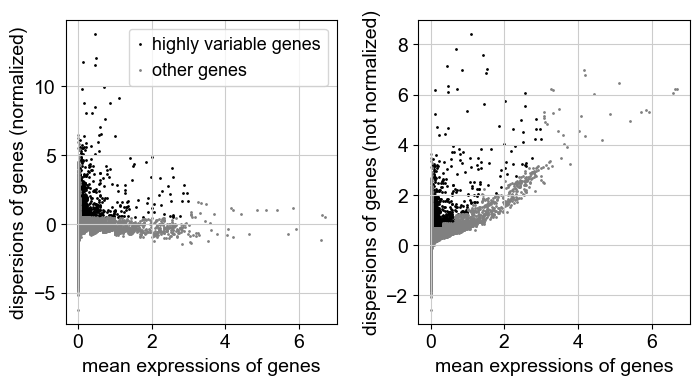

In [7]:
sc.pp.highly_variable_genes(C05, min_mean=0.05)
sc.pl.highly_variable_genes(C05)

In [8]:
sc.tl.pca(C05, use_highly_variable=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


In [16]:
n_neighbors=int(np.sqrt(C05.shape[0])/2)
sc.pp.neighbors(C05, n_neighbors=n_neighbors, n_pcs=10)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished (0:00:01)


In [17]:
tuft_markers = ['Dclk1', 'Trpm5']

R1_1 = ['Cd8a', 'Cd3g', 'Ccl5', 'Gzma', 'Gzmb', 'RGs1',
               'Nkg7', 'Cd7', 'Fcer1g']
R1_2 = ['H2-Aa', 'H2-Ab1', 'H2-Eb1', 'Cd74', 'Ly6d', 'Ebf1',
      'Cd79a', 'Mef2c']
R3 = ['Alas2', 'Hbb-bs', 'Hba-a1','Hbb-bt']
R2 = ['Krt18', 'Cd24a', 'Adh1', 'Cystm1', 'Aldh2', 'Dclk1',
     'Sh2d6', 'Rgs13', 'Hck', 'Trpm5']
    

In [18]:
sc.tl.score_genes(C05, tuft_markers, score_name='tuft')
sc.tl.score_genes(C05, R1_1, score_name='R1_1')
sc.tl.score_genes(C05, R1_2, score_name='R1_2')
sc.tl.score_genes(C05, R2, score_name='R2')
sc.tl.score_genes(C05, R3, score_name='R3')

computing score 'tuft'
    finished (0:00:00)
computing score 'R1_1'
    finished (0:00:00)
computing score 'R1_2'
    finished (0:00:00)
computing score 'R2'
    finished (0:00:00)
computing score 'R3'
    finished (0:00:00)


In [19]:
sc.tl.umap(C05)


computing UMAP
    finished (0:00:12)


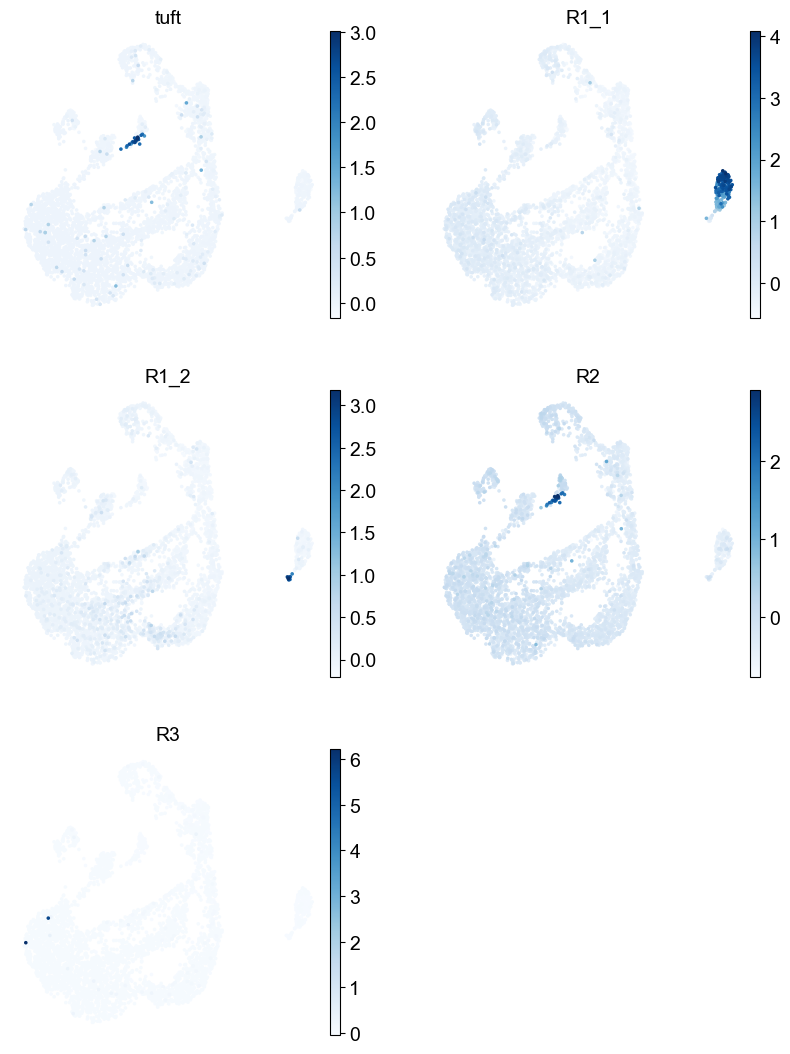

In [20]:
sc.pl.umap(C05, color=['tuft', 'R1_1', 'R1_2', 'R2', 'R3'],
          ncols=2, color_map='Blues', frameon=False)

In [21]:
scs.inference.nested_model(C05)

minimizing the nested Stochastic Block Model
        minimization step done (0:29:55)
        consensus step done (0:34:07)
    done (0:34:07)
    finished (0:34:08)


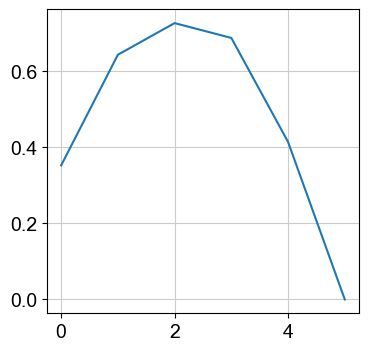

In [22]:
plot(C05.uns['schist']['stats']['modularity'])

In [23]:
scs.io.write(C05, "Crypt_C05")

In [7]:
C05 = scs.io.read("Crypt_C05")

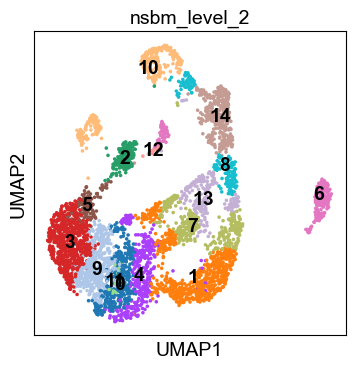

In [8]:
sc.pl.umap(C05, color='nsbm_level_2', legend_loc='on data')

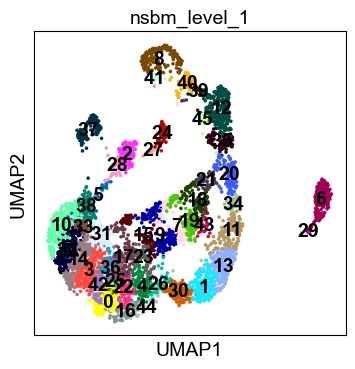

In [9]:
sc.pl.umap(C05, color='nsbm_level_1', legend_loc='on data')

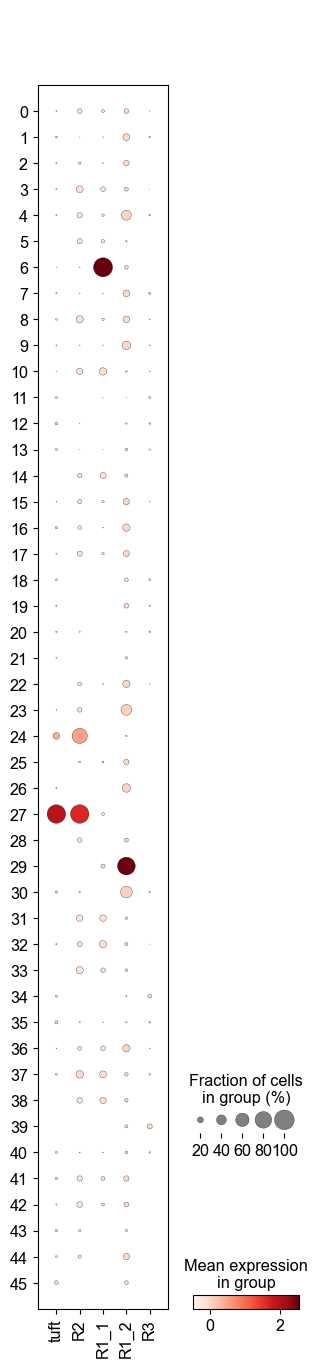

In [30]:
sc.pl.dotplot(C05, ['tuft', 'R2', 'R1_1', 'R1_2', 'R3'], groupby='nsbm_level_1')

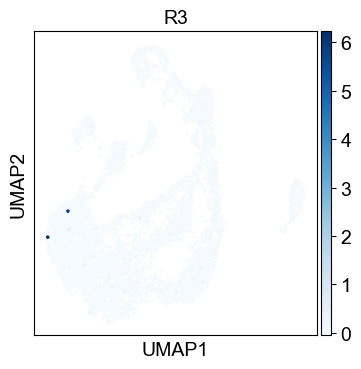

In [33]:
sc.pl.umap(C05, color='R3', color_map='Blues')

In [36]:
C05.obs.sort_values('R3', ascending=False).head(10)[['R3', 'nsbm_level_0', 'nsbm_level_1']]

,R3,nsbm_level_0,nsbm_level_1
CAGCTGGGTGACTCAT-1,6.226663,102,10
CGAGCCATCTCTAGGA-1,5.688042,18,10
CGTCAGGAGCTCCTCT-1,0.420325,15,32
TATTACCCAGGGCATA-1,0.384915,75,9
AGCTTGAGTGACTACT-1,0.308150,114,3
TAAGCGTTCTGACCTC-1,0.292426,41,12
GCTTCCAGTTGAGTTC-1,0.287371,18,10
TGAGGGAGTCTAGTGT-1,0.271884,93,0
CCGGTAGGTTGGAGGT-1,0.269209,139,36
AAAGATGGTCTGCAAT-1,0.251938,23,4


In [38]:
nl = len(C05.obs['nsbm_level_0'].cat.categories)
C05.uns['nsbm_level_0_colors'] = ['grey'] * nl
C05.uns['nsbm_level_0_colors'][102] = 'C0'
C05.uns['nsbm_level_0_colors'][18] = 'C1'

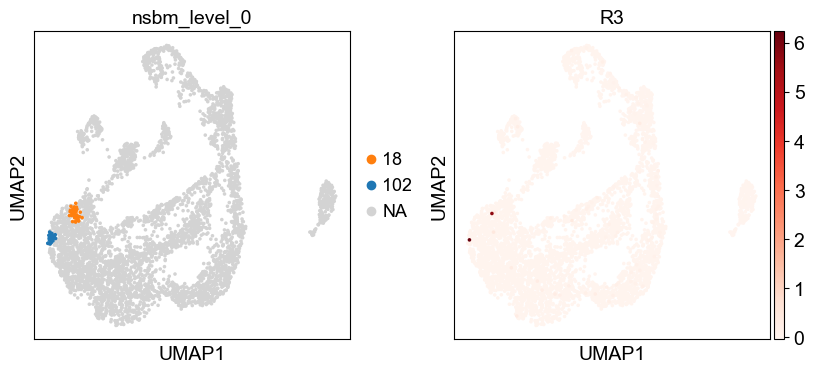

In [41]:
sc.pl.umap(C05, color=['nsbm_level_0', 'R3'], groups=['18', '102'], color_map='Reds')

/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


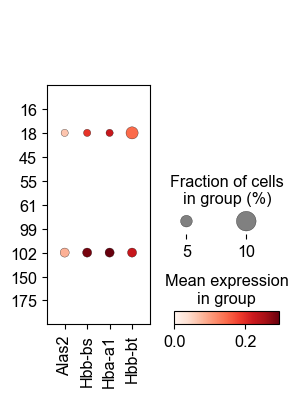

In [44]:
sc.pl.dotplot(C05[C05.obs['nsbm_level_1'] == '10'], R3,
             groupby='nsbm_level_0')

running Leiden clustering
    finished (0:02:32)


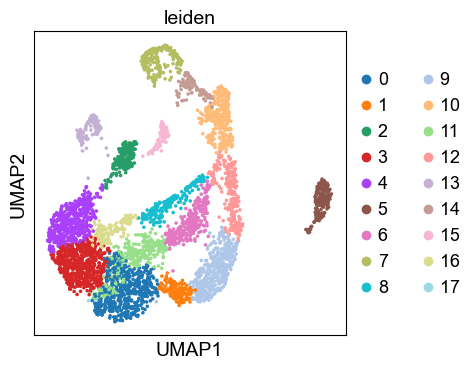

In [45]:
scs.inference.leiden(C05)
sc.pl.umap(C05, color='leiden')

running Leiden clustering
    finished (0:02:40)


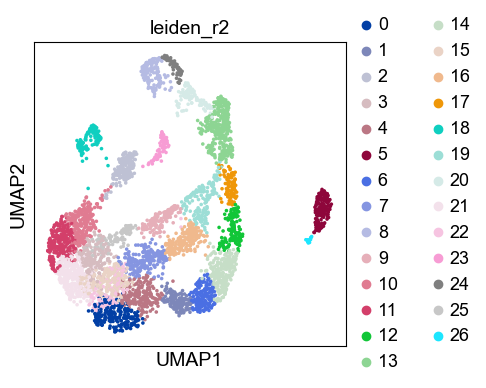

In [47]:
scs.inference.leiden(C05, resolution=2, key_added='leiden_r2')
sc.pl.umap(C05, color='leiden_r2')

In [48]:
scs.io.write(C05, "Crypt_C05")

In [49]:
n_neighbors

33

In [52]:
C05.obs['nsbm_level_0'].value_counts().tail(10)

174    3
185    3
193    2
145    2
152    2
186    1
189    1
177    1
192    1
166    1
Name: nsbm_level_0, dtype: int64

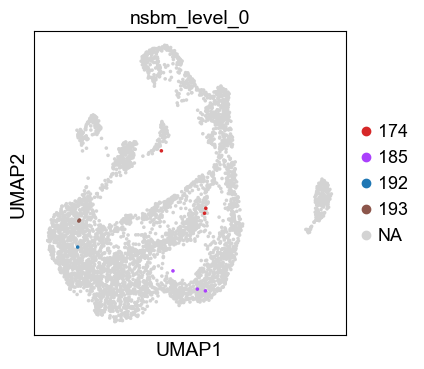

In [54]:
C05.uns['nsbm_level_0_colors'][174] = 'C3'
C05.uns['nsbm_level_0_colors'][185] = 'C4'
C05.uns['nsbm_level_0_colors'][193] = 'C5'
C05.uns['nsbm_level_0_colors'][192] = 'C0'

sc.pl.umap(C05, color='nsbm_level_0', groups=['174', '185', '193', '192'])

In [59]:
p1 = C05.obs['nsbm_level_0'].cat.categories[C05.obs['nsbm_level_0'].value_counts(sort=False) > 1]

In [62]:
sc.tl.rank_genes_groups(C05, groupby='nsbm_level_0', 
                       groups=list(p1))

ranking genes
    finished (0:00:35)


In [68]:
sc.get.rank_genes_groups_df(C05, group='185').query('pvals_adj < 1e-10').head(10)

,names,scores,logfoldchanges,pvals,pvals_adj
9408,Ggta1,-6.615392,-23.186216,4.139483e-11,9.800366e-11
9409,Rpap2,-6.620733,-22.677916,3.994026e-11,9.457365e-11
9410,Cdc42ep1,-6.625188,-22.990847,3.876548e-11,9.180526e-11
9411,Vangl2,-6.627767,-22.651314,3.810079e-11,9.024424e-11
9412,Rin1,-6.631193,-22.797970,3.723505e-11,8.820651e-11
9413,Rgs14,-6.633564,-23.179529,3.664719e-11,8.682655e-11
9414,Mcoln3,-6.642365,-23.189169,3.454384e-11,8.185507e-11
9415,Gm26881,-6.645397,-22.738846,3.384692e-11,8.021533e-11
9416,2310043O21Rik,-6.646145,-22.262461,3.367706e-11,7.982439e-11
9417,6330403L08Rik,-6.648550,-22.858727,3.313682e-11,7.855529e-11


In [69]:
p1e = C05.obs['nsbm_level_0'].cat.categories[C05.obs['nsbm_level_0'].value_counts(sort=False) == 1]

In [70]:
p1e

Index(['166', '177', '186', '189', '192'], dtype='object')

In [72]:
C05[C05.obs['nsbm_level_0'] == '192'].X

<1x16291 sparse matrix of type '<class 'numpy.float32'>'
	with 751 stored elements in Compressed Sparse Row format>

In [77]:
r = pd.DataFrame(C05.X.A)

In [80]:
np.where(C05.obs['nsbm_level_0'] == '192')

(array([2574]),)

In [81]:
R = r.rank(axis=0, ascending=False)

In [92]:
np.where(R.values[2574] < 10)[0]

array([ 2686,  4236,  5173,  6874,  8083, 14052, 15124, 15491])

In [93]:
C05.var_names[np.where(R.values[2574] < 10)[0]]

Index(['Fgd1', 'Med18', 'Usp30', 'Cd22', 'Slc5a4a', 'Ciita', 'Pot1b',
       '3222401L13Rik'],
      dtype='object')

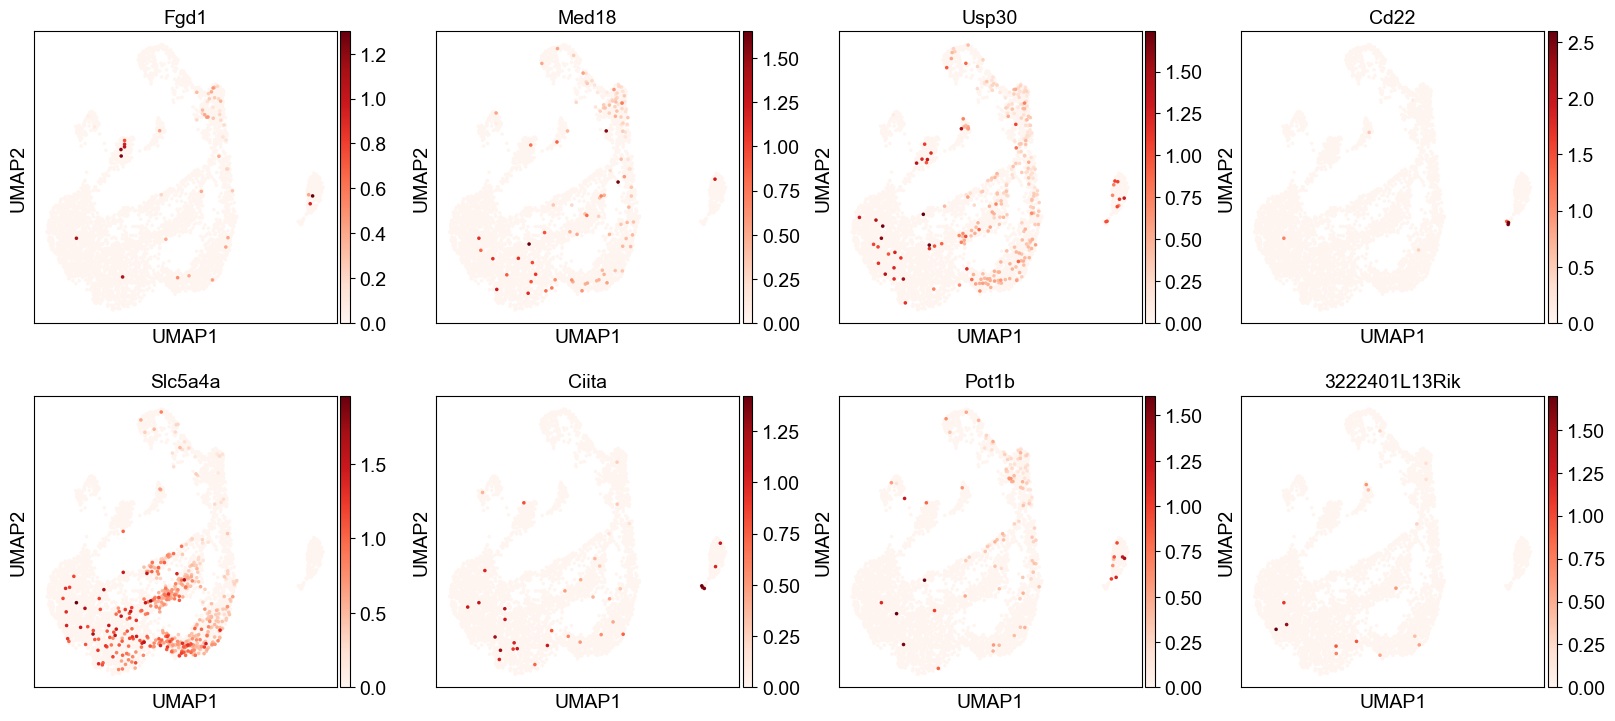

In [94]:
sc.pl.umap(C05, color=list(C05.var_names[np.where(R.values[2574] < 10)[0]]), cmap='Reds')

In [98]:
adata = scs.io.read("Crypt/Crypt_pc10_n15")

/Users/cittaro.davide/anaconda3/envs/experimental/lib/python3.8/site-packages/graph_tool/inference/blockmodel.py:387: UserWarning: unrecognized keyword arguments: ['sampling']
  warnings.warn("unrecognized keyword arguments: " +


In [99]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:10)


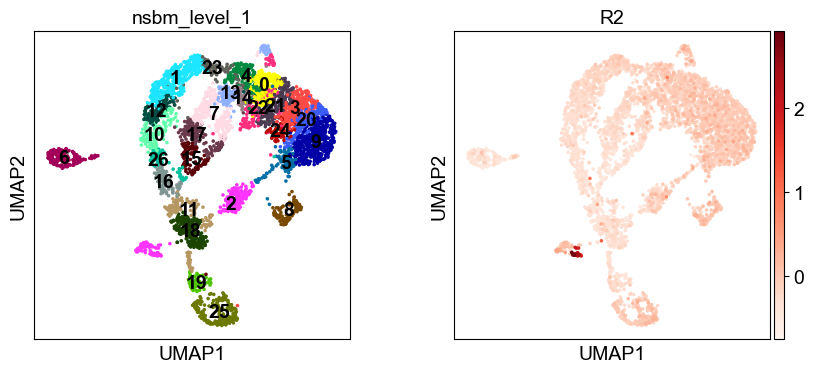

In [100]:
sc.pl.umap(adata, color=['nsbm_level_1', 'R2'], color_map='Reds', 
          legend_loc='on data')

In [102]:
np.where(pd.crosstab(adata.obs['nsbm_level_0'], adata.obs['nsbm_level_1'])['2'] > 0)[0]

array([  2,  45,  54,  55,  87, 117])

In [103]:
for n, i in enumerate(np.where(pd.crosstab(adata.obs['nsbm_level_0'], adata.obs['nsbm_level_1'])['2'] > 0)[0]):
    adata.uns['nsbm_level_0_colors'][i] = f'C{n}'

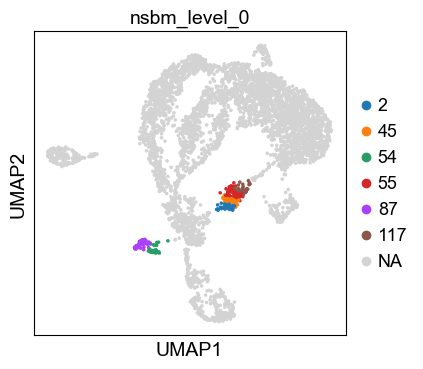

In [104]:
sc.pl.umap(adata, color='nsbm_level_0', groups=[  '2',  '45',  '54',  '55',  '87', '117'])

In [105]:
import graph_tool.all as gt

In [108]:
p1 = C05.obs['nsbm_level_0'].astype(int)
p2 = adata.obs['nsbm_level_1'].astype(int)
gt.partition_overlap(p1, p2)

0.21530249110320285

In [119]:
sc.set_figure_params(dpi_save=300)

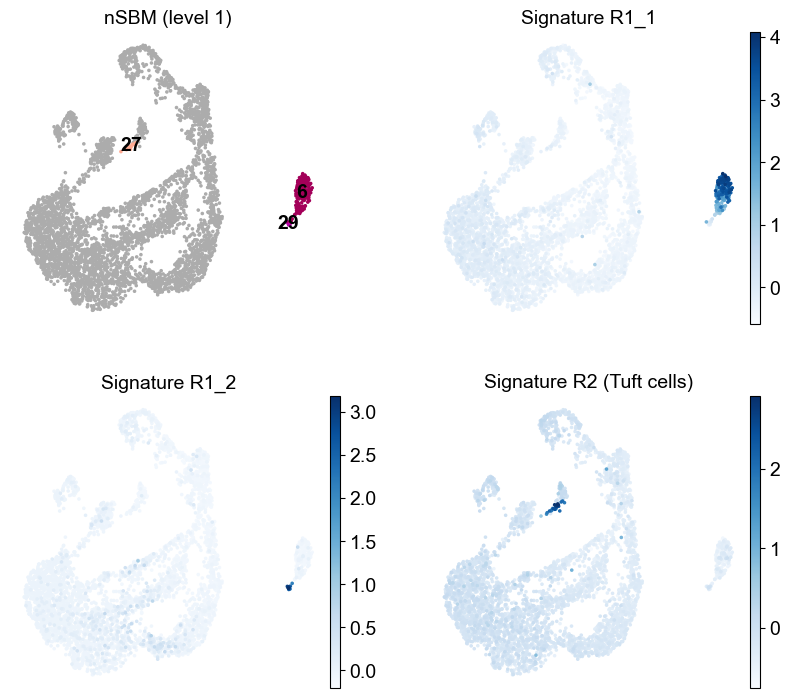

In [12]:
sc.pl.umap(C05, color=['nsbm_level_1', 'R1_1', 'R1_2','R2'], 
           legend_loc='on data', color_map='Blues', ncols=2, 
          groups=['6', '29', '27'], na_in_legend=False, na_color='#ACACAC',
          title=['nSBM (level 1)', 'Signature R1_1', 'Signature R1_2', 
                'Signature R2 (Tuft cells)'],
          frameon=False, save='Rare_Cells_Main.pdf')

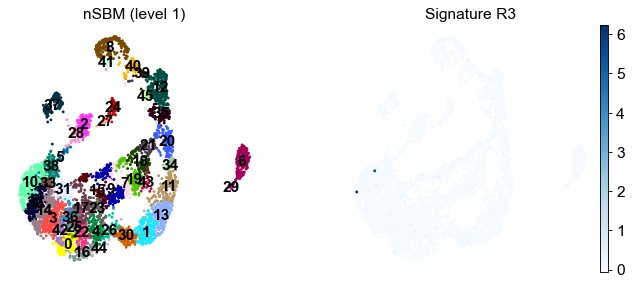

In [128]:
sc.pl.umap(C05, color=['nsbm_level_1', 'R3'], 
           legend_loc='on data', color_map='Blues', ncols=2,
          title=['nSBM (level 1)', 'Signature R3'], 
          frameon=False, save='Rare_Cells_Suppl.pdf')

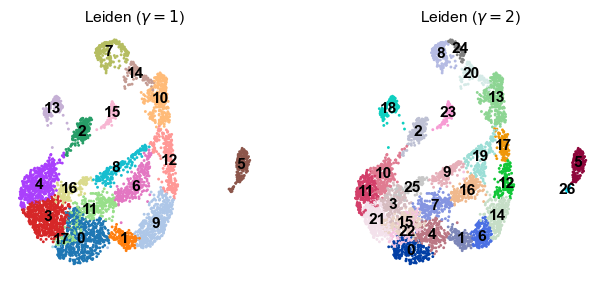

In [129]:
sc.pl.umap(C05, color=['leiden', 'leiden_r2'],
          legend_loc='on data', color_map='Blues', ncols=2,
          title=[r'Leiden ($\gamma=1$)', r'Leiden ($\gamma=2$)'], 
          frameon=False, save='Rare_Cells_Leiden_Suppl.pdf')

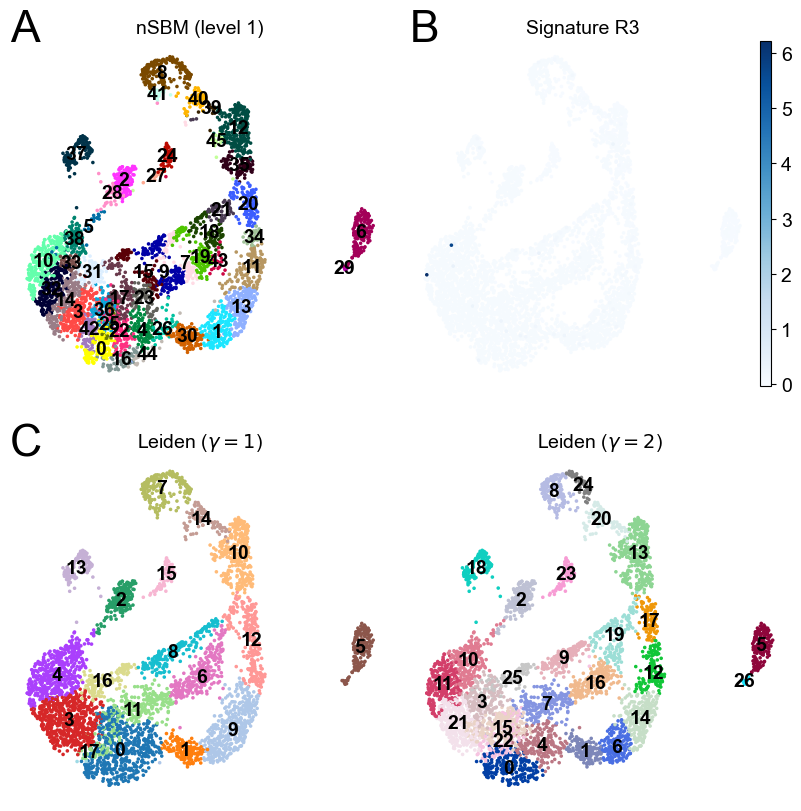

In [20]:
fig = plt.figure(constrained_layout=False, figsize=(10, 10))
gs = fig.add_gridspec(nrows=2, ncols=2, wspace=0.05)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

sc.pl.umap(C05, color='nsbm_level_1', 
           legend_loc='on data', 
          title='nSBM (level 1)',
          frameon=False, ax=ax1, show=False)
ax1.text(0,1, 'A', size=32, transform=ax1.transAxes)

sc.pl.umap(C05, color='R3', 
           legend_loc='on data', 
          title='Signature R3', color_map='Blues',
          frameon=False, ax=ax2, show=False)
ax2.text(0,1, 'B', size=32, transform=ax2.transAxes)

sc.pl.umap(C05, color='leiden',
          legend_loc='on data',
          title=r'Leiden ($\gamma=1$)',ax=ax3, show=False,
          frameon=False)
ax3.text(0,1, 'C', size=32, transform=ax3.transAxes)

sc.pl.umap(C05, color='leiden_r2',
          legend_loc='on data',
          title=r'Leiden ($\gamma=2$)', ax=ax4, show=False, 
          frameon=False)

fig.savefig("Rare_Cells_Suppl.pdf", dpi=300, transparent=True)